# Contact analysis: number of contacts within a cutoff

We calculate the number of salt bridges in an enzyme as it transitions from a closed to an open conformation.

**Last updated:** June 29, 2020 with MDAnalysis 1.0.0

**Minimum version of MDAnalysis:** 0.17.0

**Packages required:**
    
* MDAnalysis (<a data-cite="michaud-agrawal_mdanalysis_2011" href="https://doi.org/10.1002/jcc.21787">Michaud-Agrawal *et al.*, 2011</a>, <a data-cite="gowers_mdanalysis_2016" href="https://doi.org/10.25080/Majora-629e541a-00e">Gowers *et al.*, 2016</a>)
* MDAnalysisTests
* [matplotlib](https://matplotlib.org)
* [pandas](https://pandas.pydata.org)

**See also**

* [Write your own contacts analysis method](contacts_custom.ipynb)
* [Q1 vs Q2 contact analysis](contacts_q1q2.ipynb)
* [Fraction of native contacts over a trajectory](contacts_native_fraction.ipynb)

In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD
from MDAnalysis.analysis import contacts

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Background

Quantifying the number of contacts over a trajectory can give insight into the formation and unfolding of secondary and tertiary structure. This is closely related to native contacts analysis; where the fraction of native contacts refers to the fraction of contacts retained by a protein from the contacts in a reference frame, the number of contacts simply counts how many residues are within a certain cutoff for each frame. No reference is necessary. Please see the [Fraction of native contacts](contacts_native_fraction.ipynb#Background) for an introduction to native contacts analysis.

## Loading files

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. (<a data-cite="beckstein_zipping_2009" href="https://doi.org/10.1016/j.jmb.2009.09.009">Beckstein *et al.*, 2009</a>) The trajectory ``DCD`` samples a transition from a closed to an open conformation.

In [2]:
u = mda.Universe(PSF, DCD)

## Defining the groups for contact analysis

We define salt bridges as contacts between NH/NZ in ARG/LYS and OE\*/OD\* in ASP/GLU. You may not want to use this definition for real work.

In [3]:
sel_basic = "(resname ARG LYS) and (name NH* NZ)"
sel_acidic = "(resname ASP GLU) and (name OE* OD*)"
acidic = u.select_atoms(sel_acidic)
basic = u.select_atoms(sel_basic)

## Calculating number of contacts within a cutoff

Below, we define a function that calculates the number of contacts between `group_a` and `group_b` within the `radius` cutoff, for each frame in a trajectory.

In [4]:
def contacts_within_cutoff(u, group_a, group_b, radius=4.5):
    timeseries = []
    for ts in u.trajectory:
        # calculate distances between group_a and group_b
        dist = contacts.distance_array(group_a.positions, group_b.positions)
        # determine which distances <= radius
        n_contacts = contacts.contact_matrix(dist, radius).sum()
        timeseries.append([ts.frame, n_contacts])
    return np.array(timeseries)

The results are returned as a numpy array. The first column is the frame, and the second is the number of contacts present in that frame.

In [5]:
ca = contacts_within_cutoff(u, acidic, basic, radius=4.5)
ca.shape

(98, 2)

In [6]:
ca_df = pd.DataFrame(ca, columns=['Frame', 
                                  '# Contacts'])
ca_df.head()

,Frame,# Contacts
0,0,69
1,1,73
2,2,77
3,3,77
4,4,85


### Plotting

Text(0, 0.5, '# salt bridges')

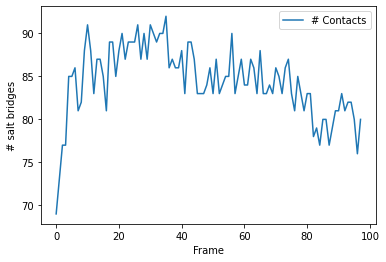

In [7]:
ca_df.plot(x='Frame')
plt.ylabel('# salt bridges')

## References

[1] Oliver Beckstein, Elizabeth&nbsp;J. Denning, Juan&nbsp;R. Perilla, and Thomas&nbsp;B. Woolf.
Zipping and <span class="bibtex-protected">Unzipping</span> of <span class="bibtex-protected">Adenylate</span> <span class="bibtex-protected">Kinase</span>: <span class="bibtex-protected">Atomistic</span> <span class="bibtex-protected">Insights</span> into the <span class="bibtex-protected">Ensemble</span> of <span class="bibtex-protected">Open</span>↔<span class="bibtex-protected">Closed</span> <span class="bibtex-protected">Transitions</span>.
<em>Journal of Molecular Biology</em>, 394(1):160–176, November 2009.
00107.
URL: <a href="https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164">https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164</a>, <a href="https://doi.org/10.1016/j.jmb.2009.09.009">doi:10.1016/j.jmb.2009.09.009</a>.

[2] Richard&nbsp;J. Gowers, Max Linke, Jonathan Barnoud, Tyler J.&nbsp;E. Reddy, Manuel&nbsp;N. Melo, Sean&nbsp;L. Seyler, Jan Domański, David&nbsp;L. Dotson, Sébastien Buchoux, Ian&nbsp;M. Kenney, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> <span class="bibtex-protected">Python</span> <span class="bibtex-protected">Package</span> for the <span class="bibtex-protected">Rapid</span> <span class="bibtex-protected">Analysis</span> of <span class="bibtex-protected">Molecular</span> <span class="bibtex-protected">Dynamics</span> <span class="bibtex-protected">Simulations</span>.
<em>Proceedings of the 15th Python in Science Conference</em>, pages 98–105, 2016.
00152.
URL: <a href="https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html">https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html</a>, <a href="https://doi.org/10.25080/Majora-629e541a-00e">doi:10.25080/Majora-629e541a-00e</a>.

[3] Naveen Michaud-Agrawal, Elizabeth&nbsp;J. Denning, Thomas&nbsp;B. Woolf, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> toolkit for the analysis of molecular dynamics simulations.
<em>Journal of Computational Chemistry</em>, 32(10):2319–2327, July 2011.
00778.
URL: <a href="http://doi.wiley.com/10.1002/jcc.21787">http://doi.wiley.com/10.1002/jcc.21787</a>, <a href="https://doi.org/10.1002/jcc.21787">doi:10.1002/jcc.21787</a>.